## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split

plt.style.use(plt.style.available[11])


## Creating the banner

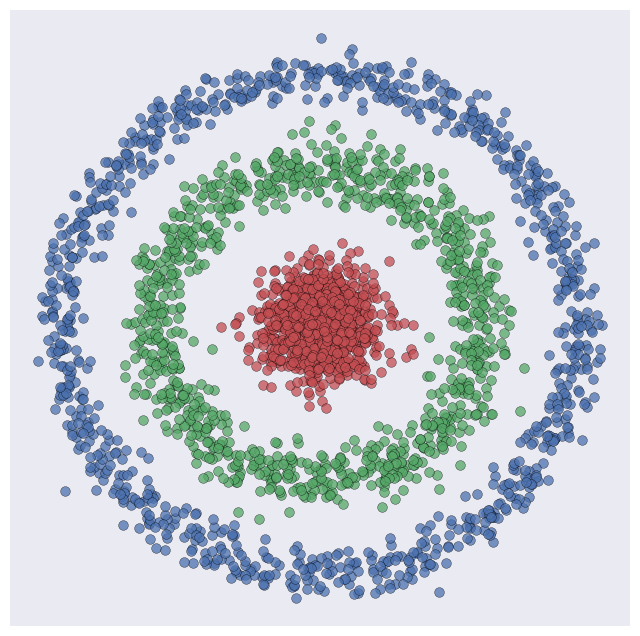

In [2]:
plt.figure(figsize=(8, 8))
N = 1000
x = np.linspace(0, 2*np.pi, N)

d1 = np.array((np.sin(x), np.cos(x))) * 8 + np.random.randn(2, N) * .4
d2 = np.array((np.sin(x), np.cos(x))) * 5 + np.random.randn(2, N) * .5
d3 = np.random.randn(2, N) * .9


plt.scatter(d1[0], d1[1], edgecolors='k', alpha=.75)
plt.scatter(d2[0], d2[1], edgecolors='k', alpha=.75)
plt.scatter(d3[0], d3[1],  edgecolors='k', alpha=.75)

# plt.plot([-12, 11], [-11, -11], 'k', alpha=.5)
# plt.plot([-11, -11], [-12, 11], 'k', alpha=.5)
plt.xticks([])
plt.yticks([])
plt.show()


## KNN Model

In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self.__predict(x) for x in X])

    def __predict(self, x):
        # compute distances
        distances = [
            self.__euclidean_distance(x, x_train) for x_train in self.X_train
        ]

        # get k nearest neighbors/samples , labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote [most common class label]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def __euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))


## Using the model

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNN(k=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

accuracy = np.sum(preds == y_test) / len(y_test)
print(accuracy)

print(classification_report(y_test, preds))


0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## With sklearn

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

preds = model.predict(X_test)
accuracy = sum(preds == y_test) / len(preds)

print(accuracy)

print(classification_report(y_test, preds))


0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

